## Importing Dependencies and loading data



In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploring data

In [126]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


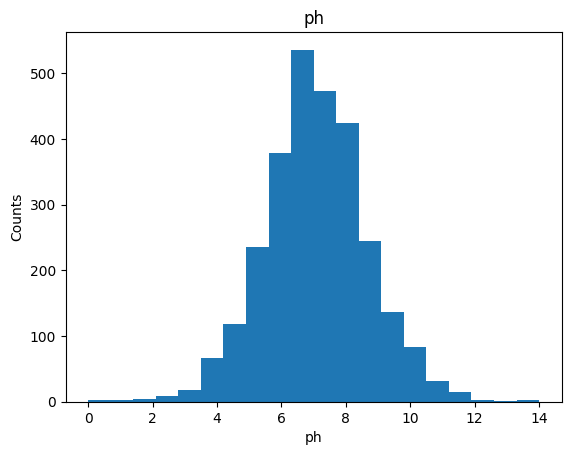

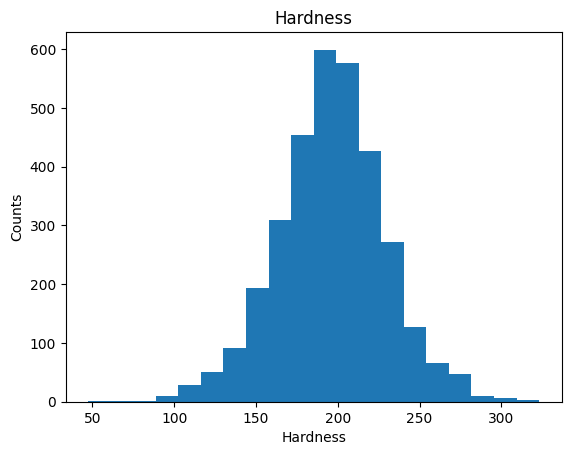

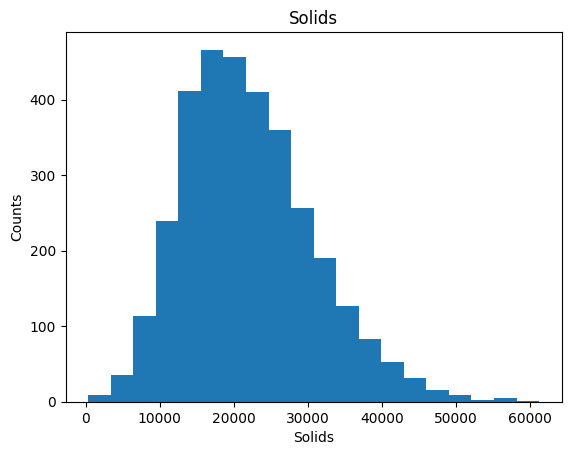

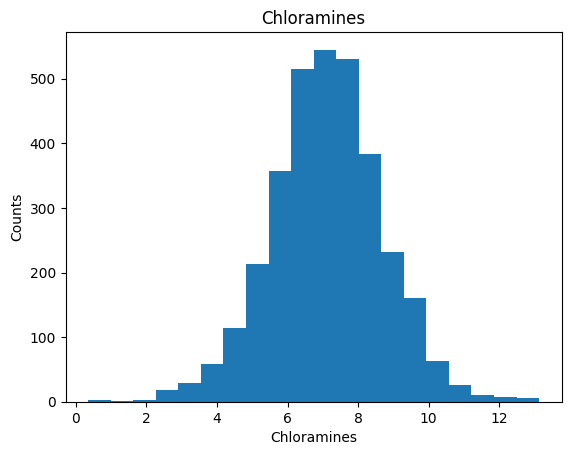

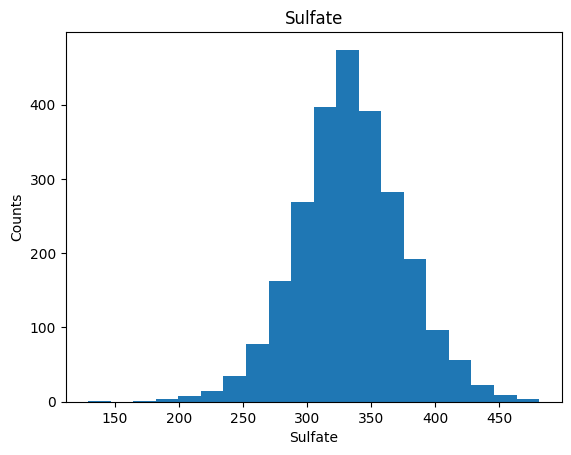

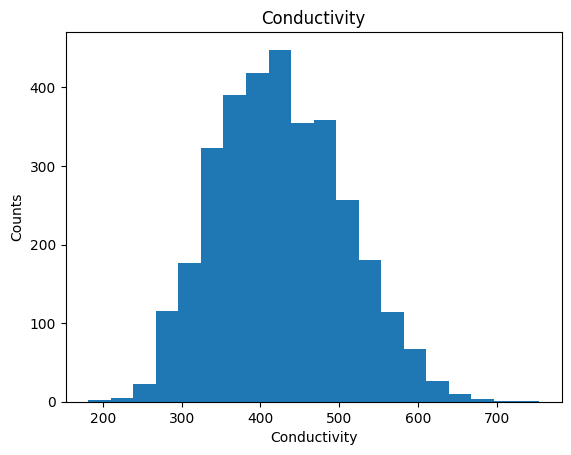

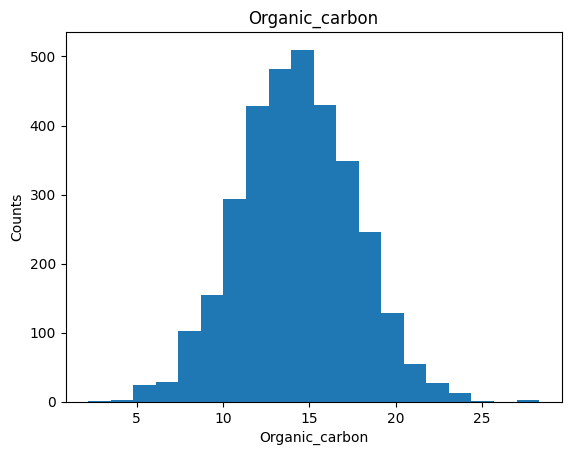

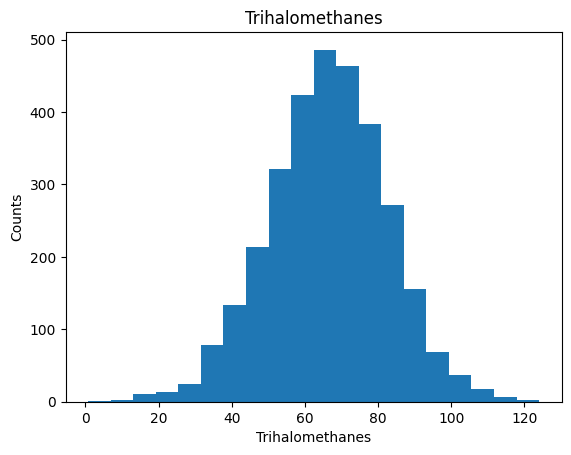

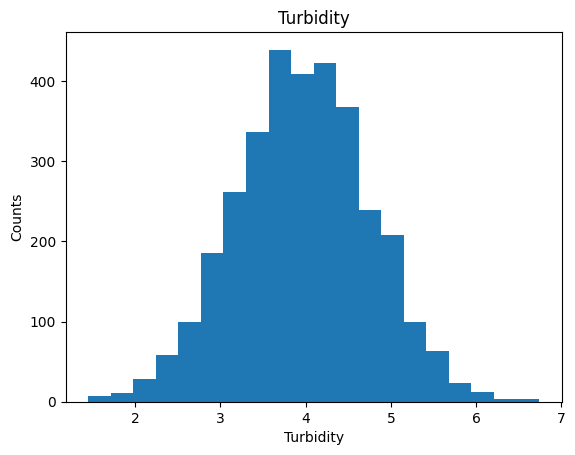

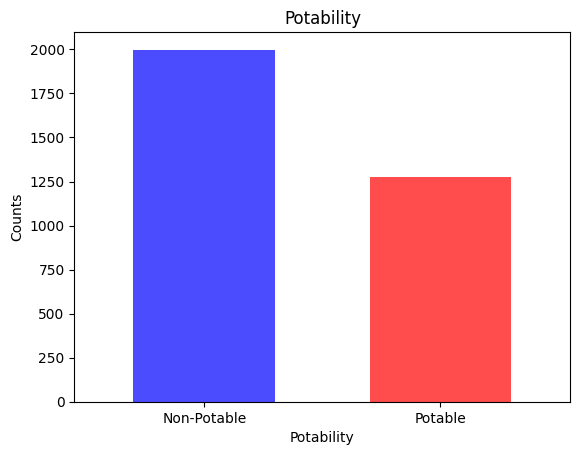

In [127]:
for feature in df.columns[:-1]:
  plt.hist(df[feature], bins=20)
  plt.title(feature)
  plt.ylabel('Counts')
  plt.xlabel(feature)
  plt.show()
  print('\n')

df['Potability'].value_counts().plot.bar(width=0.6, color=['blue', 'red'], alpha=0.7, rot=0)
plt.title('Potability')
plt.ylabel('Counts')
plt.xlabel('Potability')
plt.xticks(ticks=[0, 1], labels=['Non-Potable', 'Potable'])
plt.show()

In [128]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [129]:
df['Potability'].value_counts(normalize=True)

,proportion
Potability,
0,0.60989
1,0.39011


There are only three features with missing values. However, the missing values in 'Sulfate' and 'pH' are relatively high compared to the dataset size, which may affect data quality. Additionally, to ensure optimal model performance, we want the labels to have a balanced distribution.


In [130]:
print('pH < 6.5', df[df['ph'] < 6.5]['Potability'].value_counts(normalize=True), '\n')
print('ph >= 6.5 & ph <= 8.5', df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]['Potability'].value_counts(normalize=True), '\n')
print('pH >= 8.5', df[df['ph'] >= 8.5]['Potability'].value_counts(normalize=True))

pH < 6.5 Potability
0    0.632231
1    0.367769
Name: proportion, dtype: float64 

ph >= 6.5 & ph <= 8.5 Potability
0    0.560994
1    0.439006
Name: proportion, dtype: float64 

pH >= 8.5 Potability
0    0.668712
1    0.331288
Name: proportion, dtype: float64


In [131]:
df[df['ph'] < 6.5]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
23,3.902476,196.903247,21167.500099,6.996312,NaN,444.478883,16.609033,90.181676,4.528523,0
24,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
...,...,...,...,...,...,...,...,...,...,...
3261,3.629922,244.187392,24856.633209,6.618071,366.967873,442.076337,13.302880,59.489294,4.754826,1
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1


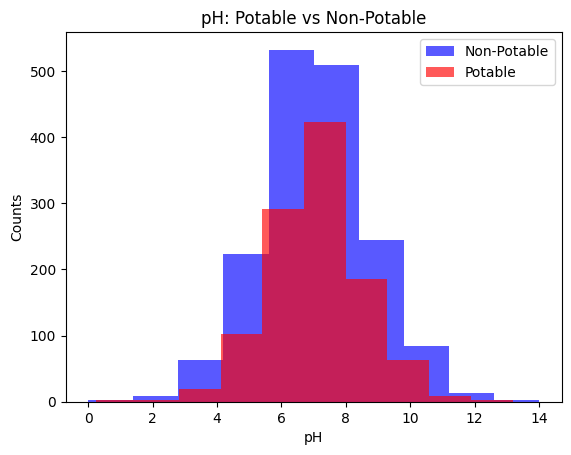

In [132]:
plt.hist(df[df['Potability'] == 0]['ph'], color='blue', label='Non-Potable', alpha=0.65, density=False)
plt.hist(df[df['Potability'] == 1]['ph'], color='red', label='Potable', alpha=0.65, density=False)
plt.title('pH: Potable vs Non-Potable')
plt.ylabel('Counts')
plt.xlabel('pH')
plt.legend()
plt.show()

The WHO's claim is not supported by this data. Water with a pH outside the acceptable range should be classified as non-potable, meaning the proportion of '0' labels should be close to 1, while the number of '1' labels should be near zero. However, we observe that over 30% of samples with out-of-range pH are still classified as potable. This further raises concerns about data quality, suggesting that the dataset may not accurately represent real-world conditions and could be artificially generated.

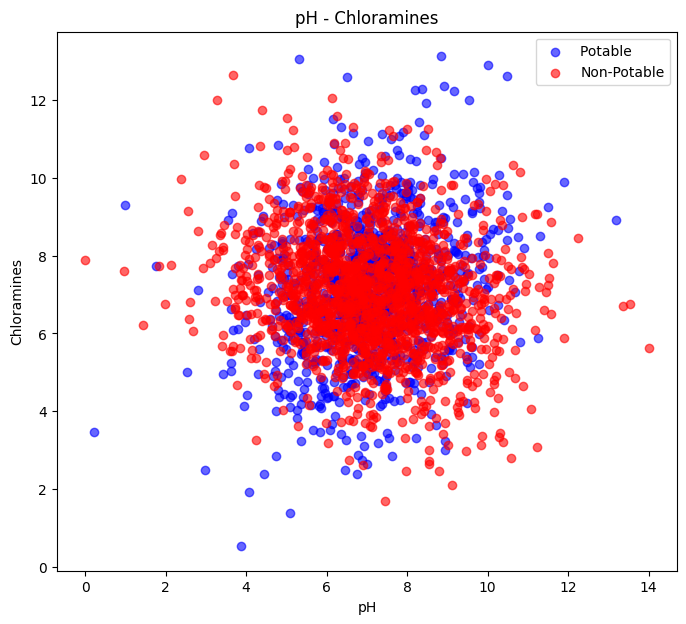

In [133]:
plt.figure(figsize=(8,7))
plt.scatter(df[df['Potability'] == True]['ph'], df[df['Potability'] == True]['Chloramines'],label='Potable ', c='b', alpha=0.6)
plt.scatter(df[df['Potability'] == False]['ph'], df[df['Potability'] == False]['Chloramines'],label='Non-Potable', c='r', alpha=0.6)
plt.title('pH - Chloramines')
plt.xlabel('pH')
plt.ylabel('Chloramines')
plt.legend()
plt.show()

The samples are indistinguishable, as they have similar mean and standard deviation.

## Preparing data

In [134]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=0)
print(df.shape, train.shape, test.shape)

(3276, 10) (2293, 10) (983, 10)


In [135]:
X_train = train.drop(columns='Potability')
y_train = train['Potability']

X_test = test.drop(columns='Potability')
y_test = test['Potability']

## Decision Tree training


In [136]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [137]:
from sklearn.metrics import accuracy_score

y_train_pred = dtree.predict(X_train)
print('Accuracy in training set:', accuracy_score(y_train_pred, y_train))
y_test_pred = dtree.predict(X_test)
print('Accuracy in test set:', accuracy_score(y_test_pred, y_test))

Accuracy in training set: 0.9986916703009159
Accuracy in test set: 0.5676500508646999


The model performs exceptionally well on the training set but poorly on the test set → **Overfitting**.

In [138]:
criterion = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_split = [2, 5, 10]
min_leaf = [1, 2]
max_features = [None, 'sqrt']
ccp = [0, 0.01]

accuracy_df = []

for crit in criterion:
  for depth in max_depth:
    for split in min_split:
      for leaf in min_leaf:
        for feat in max_features:
          for cost in ccp:
            dtree = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, max_features=feat, ccp_alpha=cost, random_state=0)
            dtree.fit(X_train, y_train)

            y_train_pred = dtree.predict(X_train)
            y_test_pred = dtree.predict(X_test)
            train_acc = accuracy_score(y_train_pred, y_train)
            test_acc = accuracy_score(y_test_pred, y_test)

            new_row = [crit, depth, split, leaf, feat, cost, train_acc, test_acc]
            accuracy_df.append(new_row)

accuracy_df = pd.DataFrame(accuracy_df, columns=['criterion', 'max_depth', 'min_samples_split', 'min_samples_lead', 'max_features', 'ccp_alpha', 'Train Acc', 'Test Acc'])

In [139]:
accuracy_df[accuracy_df['max_depth'] == 3].sort_values('Test Acc', ascending=False).head()

,criterion,max_depth,min_samples_split,min_samples_lead,max_features,ccp_alpha,Train Acc,Test Acc
96,entropy,3.0,2,1,None,0.0,0.64239,0.637843
116,entropy,3.0,10,2,None,0.0,0.64239,0.637843
112,entropy,3.0,10,1,None,0.0,0.64239,0.637843
108,entropy,3.0,5,2,None,0.0,0.64239,0.637843
104,entropy,3.0,5,1,None,0.0,0.64239,0.637843


The best performance for max_depth = 3 is achieved with the combination at index 96, as it provides the highest accuracy on both the test and training sets without overfitting.

In [140]:
accuracy_df.iloc[96]

,96
criterion,entropy
max_depth,3.0
min_samples_split,2
min_samples_lead,1
max_features,None
ccp_alpha,0.0
Train Acc,0.64239
Test Acc,0.637843


|--- Sulfate <= 259.03
|   |--- Solids <= 21161.41
|   |   |--- ph <= 6.67
|   |   |   |--- class: 0
|   |   |--- ph >  6.67
|   |   |   |--- class: 1
|   |--- Solids >  21161.41
|   |   |--- Hardness <= 220.90
|   |   |   |--- class: 1
|   |   |--- Hardness >  220.90
|   |   |   |--- class: 1
|--- Sulfate >  259.03
|   |--- Sulfate <= 387.33
|   |   |--- ph <= 4.64
|   |   |   |--- class: 0
|   |   |--- ph >  4.64
|   |   |   |--- class: 0
|   |--- Sulfate >  387.33
|   |   |--- ph <= 7.61
|   |   |   |--- class: 1
|   |   |--- ph >  7.61
|   |   |   |--- class: 0



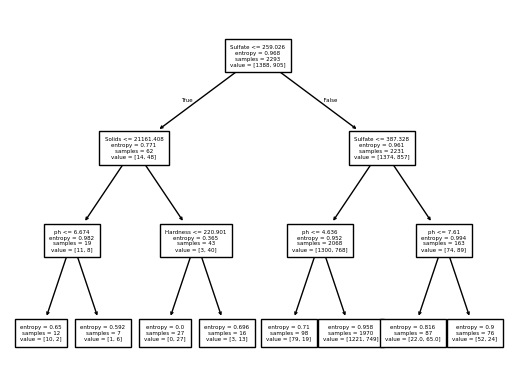

In [141]:
from sklearn.tree import plot_tree, export_text

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=None, ccp_alpha=0, random_state=0)
dtree.fit(X_train, y_train)

plot_tree(dtree, feature_names=df.columns[:-1], fontsize=4)
rules = export_text(dtree, feature_names=df.columns[:-1])
print(rules)

The tree rules are displayed in the output of the 'export_text' method, where '0' → **Non-potable** and '1' → **Potable**.

In [142]:
accuracy_df.sort_values('Test Acc', ascending=False).head()

,criterion,max_depth,min_samples_split,min_samples_lead,max_features,ccp_alpha,Train Acc,Test Acc
132,entropy,5.0,5,2,None,0.0,0.666376,0.659207
124,entropy,5.0,2,2,None,0.0,0.667248,0.658189
128,entropy,5.0,5,1,None,0.0,0.667248,0.658189
120,entropy,5.0,2,1,None,0.0,0.668120,0.656155
140,entropy,5.0,10,2,None,0.0,0.665940,0.655137


The best model is that of index = 132.

In [143]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=2, max_features=None, ccp_alpha=0, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=5,
                       min_samples_leaf=2, min_samples_split=5, random_state=0)

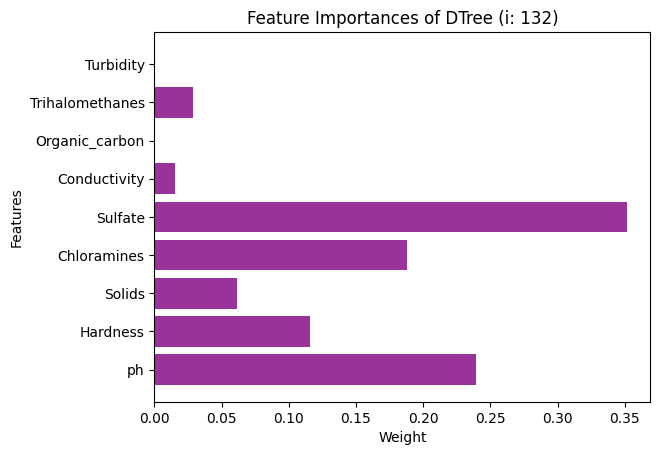

In [144]:
plt.barh(df.columns[:-1], dtree.feature_importances_, color='purple', alpha=0.8)
plt.title('Feature Importances of DTree (i: 132)')
plt.ylabel('Features')
plt.xlabel('Weight')
plt.show()

The five most important features appear to be 'Sulfate', 'pH', 'Chloramines', 'Hardness', and 'Solids', in that order of significance. If our device can support only five chemical analyses, we should prioritize those corresponding to these features.

---
Decision trees are prone to overfitting as their complexity increases. A random forest, on the other hand, consists of multiple decision trees, where the final decision is made through voting among them. This allows for a more complex model that is less likely to overfit, as it reduces variance.

In [145]:
from sklearn.ensemble import RandomForestClassifier

criterion = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_split = [2, 5, 10]
min_leaf = [1, 2]
max_features = [None, 'sqrt']
ccp = [0, 0.01]
n_estimators = [50, 100, 200]

accuracy_df = []

for crit in criterion:
  for depth in max_depth:
    for split in min_split:
      for leaf in min_leaf:
        for feat in max_features:
          for cost in ccp:
            for n_trees in n_estimators:
              rforest = RandomForestClassifier(criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, max_features=feat, ccp_alpha=cost,n_estimators = n_trees, random_state=0)
              rforest.fit(X_train, y_train)

              y_train_pred = rforest.predict(X_train)
              y_test_pred = rforest.predict(X_test)
              train_acc = accuracy_score(y_train_pred, y_train)
              test_acc = accuracy_score(y_test_pred, y_test)

              new_row = [crit, depth, split, leaf, feat, cost, n_trees, train_acc, test_acc]
              accuracy_df.append(new_row)

accuracy_df = pd.DataFrame(accuracy_df, columns=['criterion', 'max_depth', 'min_samples_split', 'min_samples_lead', 'max_features', 'ccp_alpha', 'n_estimators', 'Train Acc', 'Test Acc'])

It is more important to achieve high accuracy in identifying non-potable water, even at the cost of reduced accuracy for potable water. Misclassifying non-potable water as potable can have serious consequences if consumed. On the other hand, if a sample is mistakenly classified as non-potable when it is actually safe to drink, the only consequence is that it won’t be consumed, which is far less critical.

---

In [146]:
accuracy_df.sort_values('Test Acc', ascending=False).head()

,criterion,max_depth,min_samples_split,min_samples_lead,max_features,ccp_alpha,n_estimators,Train Acc,Test Acc
20,gini,NaN,2,2,sqrt,0.0,200,0.999564,0.696846
224,entropy,NaN,2,1,sqrt,0.0,200,1.000000,0.696846
43,gini,NaN,5,2,sqrt,0.0,100,1.000000,0.695829
284,entropy,NaN,10,2,sqrt,0.0,200,0.995639,0.694812
32,gini,NaN,5,1,sqrt,0.0,200,1.000000,0.694812


Βλέπουμε ότι το μοντέλο είναι overfitted

In [147]:
accuracy_df[accuracy_df['Train Acc'] < 0.7].sort_values('Test Acc', ascending=False).head()

,criterion,max_depth,min_samples_split,min_samples_lead,max_features,ccp_alpha,n_estimators,Train Acc,Test Acc
360,entropy,5.0,2,1,None,0.0,50,0.699520,0.665310
408,entropy,5.0,10,1,None,0.0,50,0.699956,0.665310
420,entropy,5.0,10,2,None,0.0,50,0.699520,0.665310
372,entropy,5.0,2,2,None,0.0,50,0.699084,0.664293
176,gini,5.0,5,1,sqrt,0.0,200,0.692106,0.661241


The best of model is that of index 360.

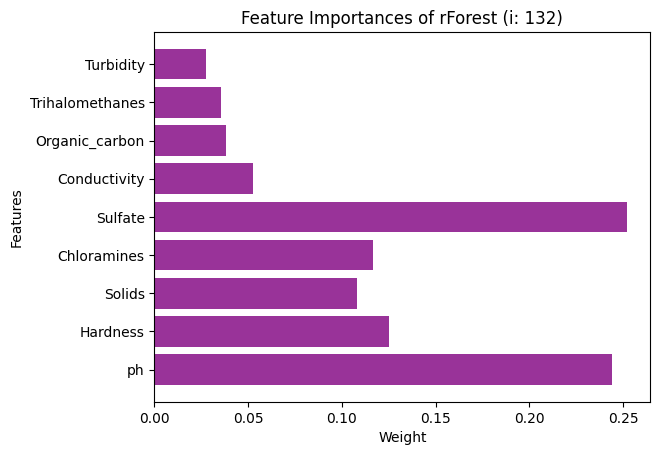

In [148]:
rforest = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None, ccp_alpha=0,n_estimators = 50, random_state=0)
rforest.fit(X_train, y_train)

plt.barh(df.columns[:-1], rforest.feature_importances_, color='purple', alpha=0.8)
plt.title('Feature Importances of rForest (i: 132)')
plt.ylabel('Features')
plt.xlabel('Weight')
plt.show()

We observe that random forests distribute feature importance more evenly compared to a single decision tree. This happens because importance is averaged across multiple trees, leading to more balanced distributions due to statistical aggregation. However, we also see that the most important features remain the same as those identified by a single decision tree.

In [149]:
from sklearn.metrics import recall_score

tree_pred = dtree.predict(X_test)
print('Recall score for Tree:', recall_score(tree_pred, y_test))
forest_pred = rforest.predict(X_test)
print('Recall score for Forest:', recall_score(forest_pred, y_test))

Recall score for Tree: 0.6439393939393939
Recall score for Forest: 0.7340425531914894
